In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
batch_size = 32
img_height = 400
img_width = 400
data_dir = "C:/Users/Alihan/Desktop/datasets/model_v5"

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3481 files belonging to 5 classes.
Using 2785 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3481 files belonging to 5 classes.
Using 696 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4']


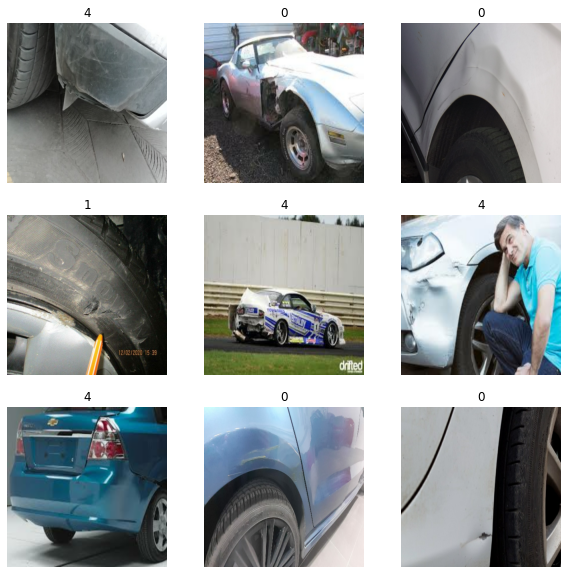

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 400, 400, 3)
(32,)


In [8]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [9]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
num_classes = 5

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes)
])

In [21]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [16]:
epochs = 40
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=batch_size)

Epoch 1/40
88/88 [==============================] - 13s 152ms/step - loss: 1.3824 - accuracy: 0.4054 - val_loss: 1.3083 - val_accuracy: 0.4282
Epoch 2/40
88/88 [==============================] - 4s 46ms/step - loss: 1.1887 - accuracy: 0.4797 - val_loss: 1.2816 - val_accuracy: 0.4526
Epoch 3/40
88/88 [==============================] - 4s 46ms/step - loss: 1.0822 - accuracy: 0.5397 - val_loss: 1.2842 - val_accuracy: 0.4885
Epoch 4/40
88/88 [==============================] - 4s 46ms/step - loss: 0.9150 - accuracy: 0.6061 - val_loss: 1.6076 - val_accuracy: 0.4569
Epoch 5/40
88/88 [==============================] - 4s 46ms/step - loss: 0.7418 - accuracy: 0.6934 - val_loss: 1.6803 - val_accuracy: 0.4871
Epoch 6/40
88/88 [==============================] - 4s 47ms/step - loss: 0.5365 - accuracy: 0.7856 - val_loss: 2.1544 - val_accuracy: 0.4698
Epoch 7/40
88/88 [==============================] - 4s 47ms/step - loss: 0.3685 - accuracy: 0.8618 - val_loss: 2.3693 - val_accuracy: 0.4813
Epoch 8/40


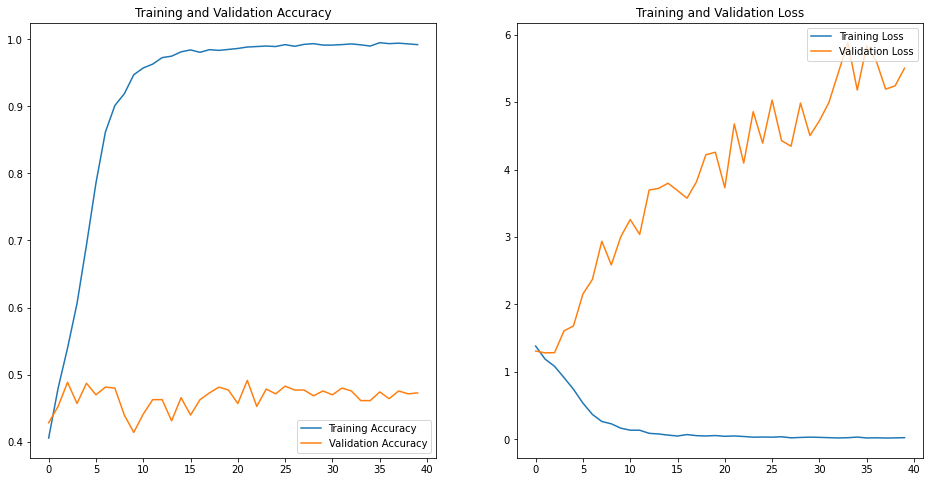

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

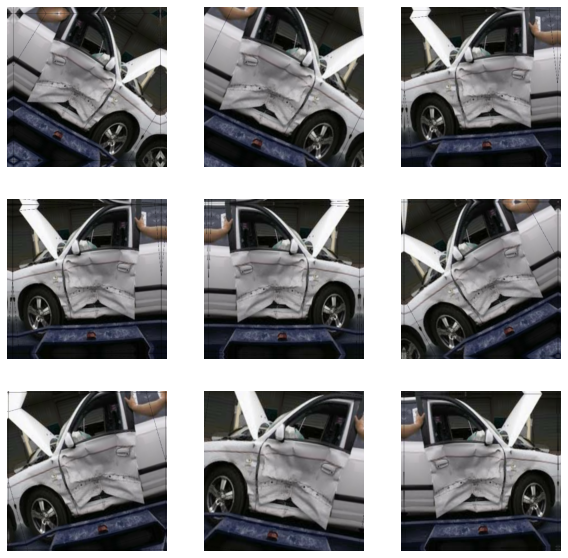

In [12]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [31]:
num_classes=5
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(num_classes)
])

In [32]:
opt = keras.optimizers.Adam()

In [33]:
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
epochs = 200

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/Alihan/Desktop/datasets",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/200
88/88 [==============================] - 9s 97ms/step - loss: 1.3959 - accuracy: 0.3846 - val_loss: 1.2629 - val_accuracy: 0.4066
Epoch 2/200
88/88 [==============================] - 8s 93ms/step - loss: 1.2383 - accuracy: 0.4557 - val_loss: 1.2332 - val_accuracy: 0.4425
Epoch 3/200
88/88 [==============================] - 9s 102ms/step - loss: 1.2116 - accuracy: 0.4700 - val_loss: 1.2636 - val_accuracy: 0.4583
Epoch 4/200
88/88 [==============================] - 9s 100ms/step - loss: 1.1970 - accuracy: 0.4754 - val_loss: 1.2422 - val_accuracy: 0.4670
Epoch 5/200
88/88 [==============================] - 8s 93ms/step - loss: 1.1760 - accuracy: 0.4923 - val_loss: 1.2497 - val_accuracy: 0.4483
Epoch 6/200
88/88 [==============================] - 10s 113ms/step - loss: 1.1635 - accuracy: 0.5056 - val_loss: 1.2178 - val_accuracy: 0.4856
Epoch 7/200
88/88 [==============================] - 9s 101ms/step - loss: 1.1466 - accuracy: 0.5124 - val_loss: 1.2761 - val_accuracy: 0.4655
E

88/88 [==============================] - 10s 117ms/step - loss: 0.6671 - accuracy: 0.7300 - val_loss: 1.6517 - val_accuracy: 0.5201
Epoch 58/200
88/88 [==============================] - 10s 118ms/step - loss: 0.6413 - accuracy: 0.7425 - val_loss: 1.6223 - val_accuracy: 0.5489
Epoch 59/200
88/88 [==============================] - 11s 121ms/step - loss: 0.6514 - accuracy: 0.7372 - val_loss: 1.4738 - val_accuracy: 0.5704
Epoch 60/200
88/88 [==============================] - 9s 105ms/step - loss: 0.6242 - accuracy: 0.7346 - val_loss: 1.7854 - val_accuracy: 0.5287
Epoch 61/200
88/88 [==============================] - 9s 105ms/step - loss: 0.6168 - accuracy: 0.7458 - val_loss: 1.6819 - val_accuracy: 0.5402
Epoch 62/200
88/88 [==============================] - 9s 105ms/step - loss: 0.6162 - accuracy: 0.7483 - val_loss: 1.8692 - val_accuracy: 0.4741
Epoch 63/200
88/88 [==============================] - 9s 105ms/step - loss: 0.6565 - accuracy: 0.7271 - val_loss: 1.6902 - val_accuracy: 0.5431
Ep

Epoch 114/200
88/88 [==============================] - 10s 109ms/step - loss: 0.4282 - accuracy: 0.8269 - val_loss: 2.1846 - val_accuracy: 0.5302
Epoch 115/200
88/88 [==============================] - 10s 109ms/step - loss: 0.3983 - accuracy: 0.8449 - val_loss: 2.1541 - val_accuracy: 0.5374
Epoch 116/200
88/88 [==============================] - 10s 116ms/step - loss: 0.4189 - accuracy: 0.8377 - val_loss: 2.2605 - val_accuracy: 0.5273
Epoch 117/200
88/88 [==============================] - 10s 113ms/step - loss: 0.4055 - accuracy: 0.8406 - val_loss: 2.2692 - val_accuracy: 0.5388
Epoch 118/200
88/88 [==============================] - 10s 113ms/step - loss: 0.4110 - accuracy: 0.8420 - val_loss: 2.3727 - val_accuracy: 0.4899
Epoch 119/200
88/88 [==============================] - 9s 108ms/step - loss: 0.4131 - accuracy: 0.8284 - val_loss: 2.1789 - val_accuracy: 0.5115
Epoch 120/200
88/88 [==============================] - 11s 122ms/step - loss: 0.4137 - accuracy: 0.8334 - val_loss: 2.0947 - 

88/88 [==============================] - 9s 106ms/step - loss: 0.3138 - accuracy: 0.8783 - val_loss: 2.9077 - val_accuracy: 0.5287
Epoch 171/200
88/88 [==============================] - 9s 106ms/step - loss: 0.3036 - accuracy: 0.8880 - val_loss: 2.5769 - val_accuracy: 0.5244
Epoch 172/200
88/88 [==============================] - 9s 106ms/step - loss: 0.3012 - accuracy: 0.8847 - val_loss: 2.8917 - val_accuracy: 0.5216
Epoch 173/200
88/88 [==============================] - 10s 109ms/step - loss: 0.3163 - accuracy: 0.8837 - val_loss: 2.5934 - val_accuracy: 0.5287
Epoch 174/200
88/88 [==============================] - 9s 106ms/step - loss: 0.3178 - accuracy: 0.8815 - val_loss: 2.7056 - val_accuracy: 0.5101
Epoch 175/200
88/88 [==============================] - 9s 106ms/step - loss: 0.2918 - accuracy: 0.8980 - val_loss: 2.4631 - val_accuracy: 0.5230
Epoch 176/200
88/88 [==============================] - 9s 104ms/step - loss: 0.3107 - accuracy: 0.8732 - val_loss: 2.8862 - val_accuracy: 0.510

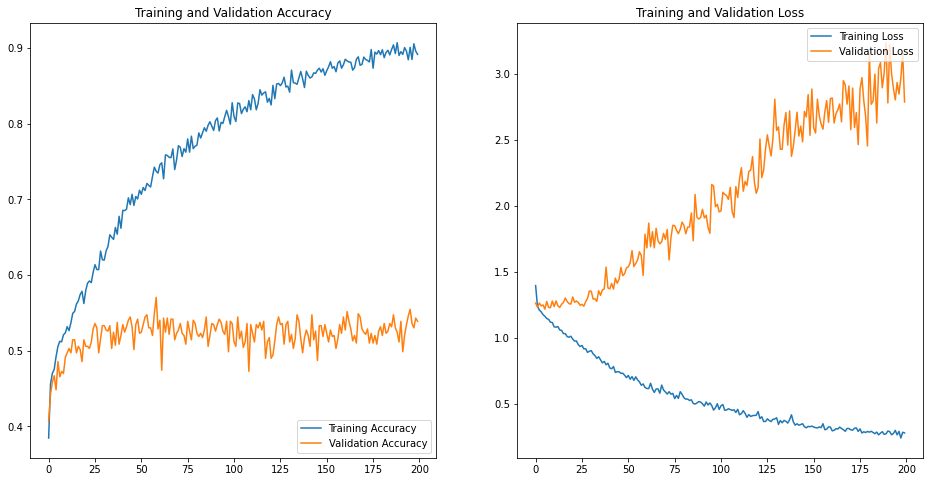

In [35]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
model.load_weights("C:/Users/Alihan/Desktop/datasets")
model.evaluate(val_ds)

22/22 [==============================] - 1s 24ms/step - loss: 1.4738 - accuracy: 0.5704


[1.4738376140594482, 0.5704023241996765]

In [39]:
model.save("modelc5.h5")

In [164]:
val_ds_labels = np.array([])
for _,label in val_ds.take(22):
    val_ds_labels = np.append(val_ds_labels,label.numpy())

In [165]:
val_ds_labels.shape

(696,)

In [166]:
pred = model.predict(val_ds)
pred = [np.argmax(row) for row in pred]
pred = np.array(pred)

In [167]:
pred.shape

(696,)

In [168]:
from sklearn.metrics import classification_report

In [171]:
print(classification_report(val_ds_labels, pred))

              precision    recall  f1-score   support

         0.0       0.59      0.48      0.53       277
         1.0       0.33      0.07      0.12        14
         2.0       0.55      0.38      0.45        45
         3.0       0.48      0.51      0.50       115
         4.0       0.55      0.69      0.61       245

    accuracy                           0.55       696
   macro avg       0.50      0.43      0.44       696
weighted avg       0.55      0.55      0.54       696



In [172]:
from sklearn.metrics import confusion_matrix

In [173]:
confusion_matrix(val_ds_labels, pred)

array([[134,   1,   7,  36,  99],
       [  7,   1,   0,   1,   5],
       [ 10,   0,  17,   5,  13],
       [ 29,   0,   3,  59,  24],
       [ 49,   1,   4,  22, 169]], dtype=int64)

In [151]:
import pandas as pd

In [152]:
df = pd.DataFrame(confusion_matrix(val_ds_labels, pred))
df.columns = ["Kaporta", "Lastik","Cam", "Kapı", "Tampon"]
df.index = ["Kaporta", "Lastik","Cam", "Kapı", "Tampon"]

In [156]:
df

,Kaporta,Lastik,Cam,Kapı,Tampon
Kaporta,134,1,7,36,99
Lastik,7,1,0,1,5
Cam,10,0,17,5,13
Kapı,29,0,3,59,24
Tampon,49,1,4,22,169


In [174]:
from collections import Counter
print(Counter(val_ds_labels),Counter(pred))

Counter({0.0: 277, 4.0: 245, 3.0: 115, 2.0: 45, 1.0: 14}) Counter({4: 310, 0: 229, 3: 123, 2: 31, 1: 3})
